In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

W0621 18:28:22.152585 140589136545600 __init__.py:316] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [2]:
from tensorflow.python.keras.layers import Conv2D, Dense, MaxPool2D, UpSampling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.datasets import cifar10, mnist

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
# x_train = np.reshape(x_train, (len(x_train), x_train.shape[1], x_train.shape[2],x_train.shape[3]))
# x_test = np.reshape(x_test, (len(x_test), x_test.shape[1], x_test.shape[2],x_test.shape[3]))

# x_train = np.reshape(x_train, (len(x_train), x_train.shape[1], x_train.shape[2], 1))
# x_test = np.reshape(x_test, (len(x_test), x_test.shape[1], x_test.shape[2], 1))

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
def show(image, resize=True, cmap=None, figsize=None):
    
    if resize is True:
        if len(image.shape) == 3 and image.shape[2] == 3:
            image = image.reshape(image.shape[0],image.shape[1], image.shape[2])
        elif len(image.shape) == 3 and image.shape[2] == 1:
            image = image.reshape(image.shape[0],image.shape[1])
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    
    if cmap is not None:
        cmap=cmap
    else:
        cmap="gray"
    
    plt.imshow(image, cmap=cmap)
    
def return_random_image(image_list):
    r = random.randint(0, len(image_list)-1)
    print(r)
    return image_list[r], r

46137


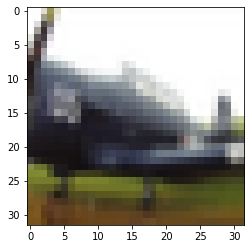

In [9]:
show(return_random_image(x_train)[0], cmap=None)

In [10]:
x_train.shape[1:]

(32, 32, 3)

In [11]:
def autoencoder(input_shape):
    model = Sequential()
    
    model.add(Conv2D(68, (3,3), input_shape=input_shape, activation="relu", padding="same"))
    model.add(MaxPool2D((2,2), padding="same"))
    
    model.add(Conv2D(68, (3,3), activation="relu", padding="same"))
    model.add(Conv2D(68, (3,3), activation="relu", padding="same"))
    model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(MaxPool2D((2,2), padding="same"))
    
    model.add(Conv2D(16, (3,3), activation="relu", padding="same"))
    model.add(Conv2D(8, (3,3), activation="relu", padding="same"))
    
    #decoding
    model.add(Conv2D(8, (3,3), activation="relu", padding="same"))    
    model.add(Conv2D(16, (3,3), activation="relu", padding="same"))  
    
    model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2)))
    
    model.add(Conv2D(68, (3,3), activation="relu", padding="same"))
    model.add(Conv2D(68, (3,3), activation="relu", padding="same"))    
    
    model.add(Conv2D(68, (3,3), activation="relu", padding="same"))
    model.add(UpSampling2D((2,2)))
    
    model.add(Conv2D(3, (3,3), activation="sigmoid", padding="same"))
    
    return model   

In [12]:
autoencoder_model = autoencoder((32,32,3))

autoencoder_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["mean_squared_error"])

W0621 18:28:22.830258 140589136545600 deprecation.py:506] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1624: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0621 18:28:23.012187 140589136545600 deprecation.py:323] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
autoencoder_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 68)        1904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 68)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 68)        41684     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 68)        41684     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        19616     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          4

In [14]:
autoencoder_model.fit(
    x_train, x_train,
    batch_size=8,
    epochs=50,
    validation_data=(x_test, x_test)
)

W0621 18:28:23.356772 140589136545600 deprecation.py:323] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:460: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.5713 - mean_squared_error: 0.0096 - val_loss: 0.5620 - val_mean_squared_error: 0.0055
Epoch 2/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.5592 - mean_squared_error: 0.0048 - val_loss: 0.5576 - val_mean_squared_error: 0.0038
Epoch 3/50
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.5566 - mean_squared_error: 0.0038 - val_loss: 0.5568 - val_mean_squared_error: 0.0035
Epoch 4/50
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.5555 - mean_squared_error: 0.0034 - val_loss: 0.5553 - val_mean_squared_error: 0.0030
Epoch 5/50
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.5549 - mean_squared_error: 0.0031 - val_loss: 0.5632 - val_mean_squared_error: 0.0059
Epoch 6/50
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.5548 - mean_squared_er

50000/50000 [==============================] - 46s 918us/sample - loss: 0.5519 - mean_squared_error: 0.0020 - val_loss: 0.5528 - val_mean_squared_error: 0.0020
Epoch 49/50
50000/50000 [==============================] - 50s 1000us/sample - loss: 0.5519 - mean_squared_error: 0.0020 - val_loss: 0.5525 - val_mean_squared_error: 0.0019
Epoch 50/50
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.5519 - mean_squared_error: 0.0020 - val_loss: 0.5528 - val_mean_squared_error: 0.0020


In [22]:
autoencoder_model.save("autoencoder_color.h5")

In [23]:
predictions = autoencoder_model.predict(x_test)

1932


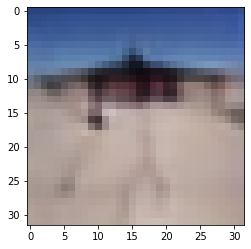

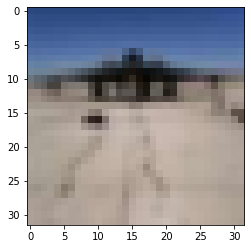

In [50]:
image, index = return_random_image(predictions)
show(image)
plt.show()
show(x_test[index])
plt.show()

In [19]:
query = x_test[index]

In [20]:
from tensorflow.keras.models import Model

In [21]:
encoder = Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer("encoder").output)

W0621 19:08:50.589583 140589136545600 deprecation_wrapper.py:118] From /home/stefanini/.virtualenvs/deep/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:10: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



ValueError: No such layer: encoder

In [ ]:
a = encoder.predict(x_test[index].reshape((1,32,32,3)))
a.shape

In [ ]:
show(a.reshape(4,4*8), resize=False)

In [ ]:
predicted = encoder.predict(x_test)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nb = NearestNeighbors(n_neighbors=5)
nb.fit(predicted)